In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("micro_credit_defaulter.csv")
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 37 columns]

In [3]:
df.iloc[:,:15]

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  
0                     1539.0  
1                     5787.0  
2                     1539.0  
3                        0.0  
4                     2309.0  
...                      ...  
209588                3178.0  
209589                 773.0  
209590                1539.0  
209591                 773.0  
209592                4532.5  

[209593 rows x 15 columns]

In [4]:
df.iloc[:,15:31]

medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81            0.0   
209589                 773.0                111.80            0.0   
209590                1539.0                 47.13            0.0   
209591                2410.5                100.00            0.0   
209592                7526.0                392.20            0.0   

        fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
0                0.0              0             0            2            12   
1                0.0              0             0            1            12   
2                0.0              0             0            1             6   
3                0.0              0             0            2            12   
4                0.0              0             0            7            42   
...              ...            ...           ...          ...           ...   
209588           0.0              0             0            2            12   
209589           0.0              0             0            3            18   
209590           0.0              0             0            4            42   
209591           0.0              1             0            2            18   
209592           0.0              0             0            2            18   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  
0                   6.0                 0.0          2.0            12  
1                  12.0                 0.0          1.0            12  
2                   6.0                 0.0          1.0             6  
3                   6.0                 0.0          2.0            12  
4                   6.0                 0.0          7.0            42  
...                 ...                 ...          ...           ...  
209588              6.0                 0.0          2.0            12  
209589              6.0                 0.0          3.0            18  
209590             12.0                 0.0          6.0            54  
209591             12.0                 0.0          3.0            24  
209592             12.0                 0.0          2.0            18  

[209593 rows x 16 columns]

In [5]:
df.iloc[:,31:]

maxamnt_loans90  medianamnt_loans90  payback30  payback90 pcircle  \
0                     6                 0.0  29.000000  29.000000     UPW   
1                    12                 0.0   0.000000   0.000000     UPW   
2                     6                 0.0   0.000000   0.000000     UPW   
3                     6                 0.0   0.000000   0.000000     UPW   
4                     6                 0.0   2.333333   2.333333     UPW   
...                 ...                 ...        ...        ...     ...   
209588                6                 0.0   1.000000   1.000000     UPW   
209589                6                 0.0   1.000000   1.000000     UPW   
209590               12                 0.0   4.000000   3.833333     UPW   
209591               12                 0.0   0.000000  10.500000     UPW   
209592               12                 0.0   0.000000   0.000000     UPW   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 6 columns]

EDA PROCESS

In [6]:
df.drop(["Unnamed: 0","msisdn","pcircle"],axis=1,inplace=True)

In [7]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate'],
      dtype='object')

In [8]:
list=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate']
for i in list:
    vc=df[i].value_counts()
    print(vc)

1    183431
0     26162
Name: label, dtype: int64
95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
              ... 
832037.7123      1
932056.6019      1
890451.7726      1
670233.0281      1
919992.9709      1
Name: aon, Length: 4507, dtype: int64
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
2074.366667        1
3210.520000        1
10279.402670       1
94.225000          1
3265.066667        1
Name: daily_decr30, Length: 146328, dtype: int64
0.00        4063
500.00       782
1000.00      490
700.00       343
600.00       319
            ... 
6984.77        1
14636.64       1
8482.00        1
33557.90       1
3913.55        1
Name: daily_decr90, Length: 155483, dtype: int64
0.00       7566
200.13     1379
99.56      1020
400.26      530
199.12      461
           ... 
1233.43       1
5467.92       1
4887.48       1
1047.30       1
1683.60       1
Name: renta

In [9]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [10]:
df["pdate"]=pd.to_datetime(df["pdate"])

In [11]:
df['p_month']=df['pdate'].dt.month
df["p_date"]=df["pdate"].dt.day
df.drop("pdate",axis=1,inplace=True)

In [12]:
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  p_month  \
0                     6                 0.0  29.000000  29.000000        7   
1                    12                 0.0   0.000000   0.000000       10   
2                     6                 0.0   0.000000   0.000000        8   
3                     6                 0.0   0.000000   0.000000        6   
4                     6                 0.0   2.333333   2.333333        6   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000        6   
209589                6                 0.0   1.000000   1.000000       12   
209590               12                 0.0   4.000000   3.833333        7   
209591               12                 0.0   0.000000  10.500000        7   
209592               12                 0.0   0.000000   0.000000        7   

        p_date  
0           20  
1            8  
2           19  
3            6  
4           22  
...        ...  
209588      17  
209589       6  
209590      29  
209591      25  
209592       7  

[209593 rows x 35 columns]

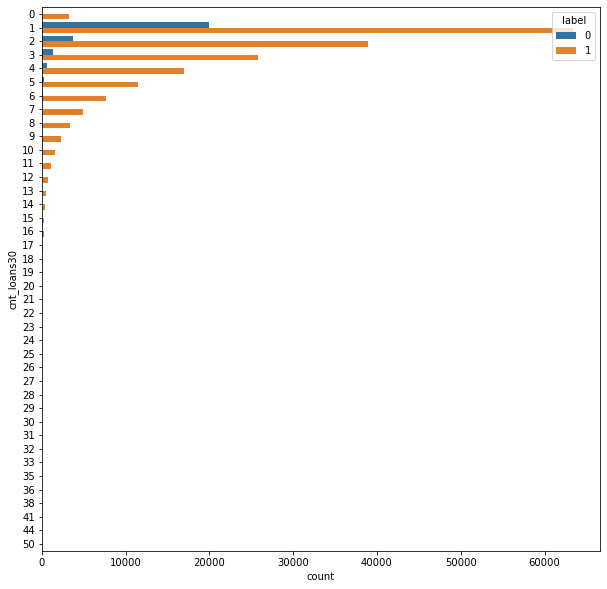

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='cnt_loans30', hue='label', data = df)
plt.savefig("cnt_loans30-label.png")

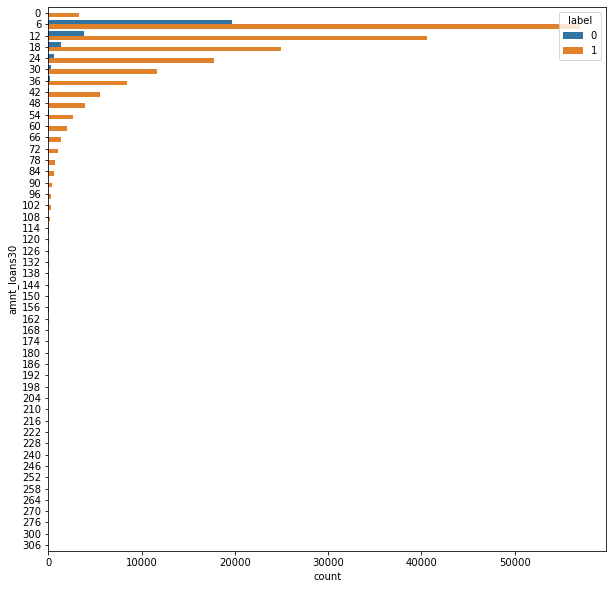

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(y='amnt_loans30', hue='label', data = df)
plt.savefig("amnt_loans30-label.png")

<Figure size 720x720 with 0 Axes>

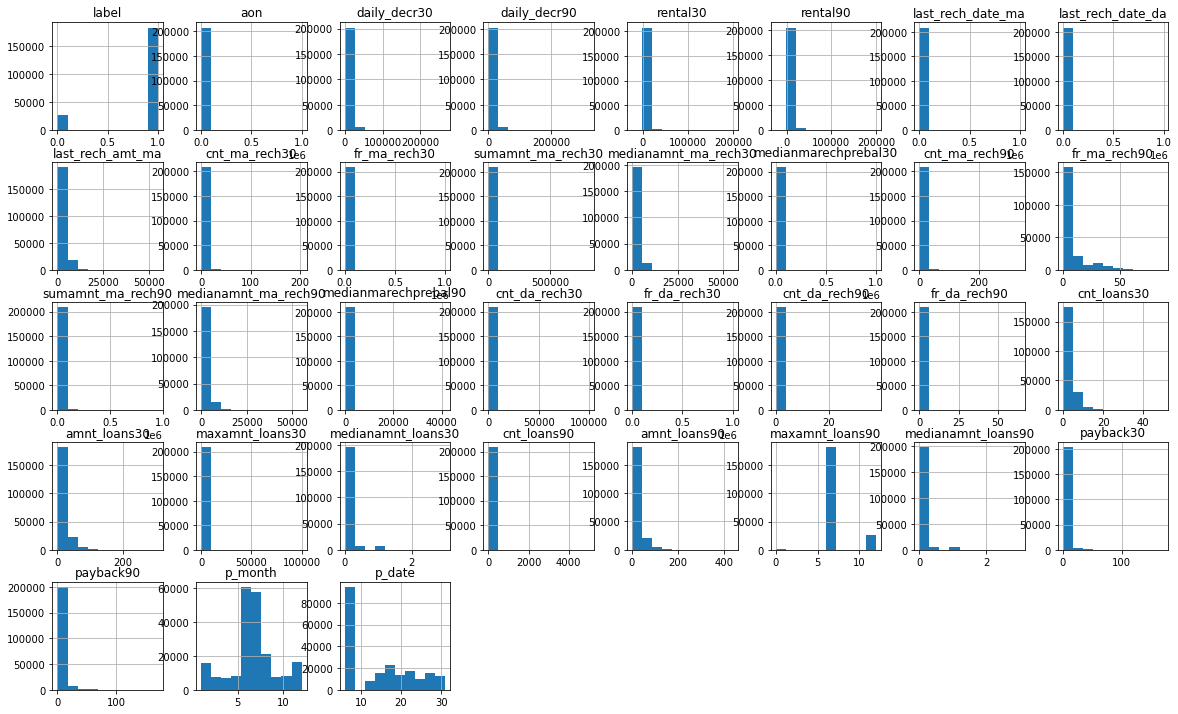

In [15]:
plt.figure(figsize=(10,10))
df.hist(figsize=(20,20),grid=True,layout=(8,8))
plt.savefig("micro-credit-hist.png")

In [16]:
dfd=df.describe()

In [17]:
dfd.iloc[:,:16]

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368100      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419300      336.00000   

        fr_ma_rech90  
count  209593.000000  
mean        7.716780  
std        12.590251  
min         0.000000  
25%         0.000000  
50%         2.000000  
75%         8.000000  
max        88.000000

In [18]:
dfd.iloc[:,16:31]

sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
count      209593.000000         209593.000000         209593.000000   
mean        12396.218352           1864.595821             92.025541   
std         16857.793882           2081.680664            369.215658   
min             0.000000              0.000000           -200.000000   
25%          2317.000000            773.000000             14.600000   
50%          7226.000000           1539.000000             36.000000   
75%         16000.000000           1924.000000             79.310000   
max        953036.000000          55000.000000          41456.500000   

       cnt_da_rech30   fr_da_rech30  cnt_da_rech90   fr_da_rech90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean      262.578110    3749.494447       0.041495       0.045712   
std      4183.897978   53885.414979       0.397556       0.951386   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     99914.441420  999809.240100      38.000000      64.000000   

         cnt_loans30   amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
count  209593.000000  209593.000000    209593.000000       209593.000000   
mean        2.758981      17.952021       274.658747            0.054029   
std         2.554502      17.379741      4245.264648            0.218039   
min         0.000000       0.000000         0.000000            0.000000   
25%         1.000000       6.000000         6.000000            0.000000   
50%         2.000000      12.000000         6.000000            0.000000   
75%         4.000000      24.000000         6.000000            0.000000   
max        50.000000     306.000000     99864.560860            3.000000   

         cnt_loans90   amnt_loans90  maxamnt_loans90  medianamnt_loans90  
count  209593.000000  209593.000000    209593.000000       209593.000000  
mean       18.520919      23.645398         6.703134            0.046077  
std       224.797423      26.469861         2.103864            0.200692  
min         0.000000       0.000000         0.000000            0.000000  
25%         1.000000       6.000000         6.000000            0.000000  
50%         2.000000      12.000000         6.000000            0.000000  
75%         5.000000      30.000000         6.000000            0.000000  
max      4997.517944     438.000000        12.000000            3.000000

In [19]:
dfd.iloc[:,31:]

payback30      payback90        p_month         p_date
count  209593.000000  209593.000000  209593.000000  209593.000000
mean        3.398826       4.321485       6.612253      14.584008
std         8.813729      10.308108       2.371940       7.953396
min         0.000000       0.000000       1.000000       6.000000
25%         0.000000       0.000000       6.000000       7.000000
50%         0.000000       1.666667       7.000000      14.000000
75%         3.750000       4.500000       8.000000      21.000000
max       171.500000     171.500000      12.000000      31.000000

In [20]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

label                     AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
aon                     AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
daily_decr30            AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
daily_decr90            AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
rental30                AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
rental90                AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
last_rech_date_ma       AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
last_rech_date_da       AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
last_rech_amt_ma          AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
cnt_ma_rech30           AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
fr_ma_rech30            AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
sumamnt_ma_rech30       AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
medianamnt_ma_rech30    AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
medianmarechprebal30    AxesSubplot(0.

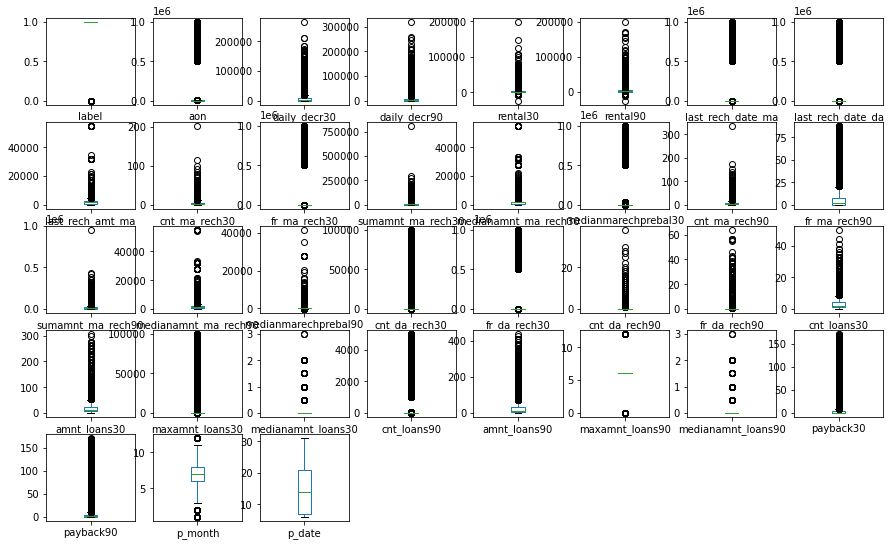

In [21]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z[0]

array([2.64789583, 0.10357685, 0.25229941, 0.27634619, 0.57384426,
       0.55858346, 0.06963723, 0.06954985, 0.22163706, 0.46476047,
       0.06927876, 0.45628055, 0.13222429, 0.07118488, 0.59991084,
       1.05504263, 0.55275564, 0.15641044, 0.22893326, 0.06275935,
       0.0695829 , 0.10437483, 0.04804835, 0.29711555, 0.34246974,
       0.06328449, 0.24779393, 0.07349265, 0.43995041, 0.33421157,
       0.22959366, 2.9046997 , 2.39409346, 0.16347281, 0.68096756])

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228330  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  p_month  \
0                     6                 0.0  29.000000  29.000000        7   
1                    12                 0.0   0.000000   0.000000       10   
2                     6                 0.0   0.000000   0.000000        8   
3                     6                 0.0   0.000000   0.000000        6   
4                     6                 0.0   2.333333   2.333333        6   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000        6   
209589                6                 0.0   1.000000   1.000000       12   
209590               12                 0.0   4.000000   3.833333        7   
209591               12                 0.0   0.000000  10.500000        7   
209592               12                 0.0   0.000000   0.000000        7   

        p_date  
0           20  
1            8  
2           19  
3            6  
4           22  
...        ...  
209588      17  
209589       6  
209590      29  
209591      25  
209592       7  

[161465 rows x 35 columns]

In [24]:
df_new.skew()

label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90             1.695156
maxamnt_loans9

In [25]:
df.shape

(209593, 35)

In [26]:
161465/209593

0.7703740105824145

In [27]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [28]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'p_month', 'p_date'],
      dtype='object')

In [29]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
p_month                 0
p_date                  0
dtype: int64

USING BOX-COX METHOD TO REMOVE SKEWNESS

In [30]:
values=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
from scipy.special import boxcox1p
for i in values:
    df[i]=boxcox1p(df[i],0.5)
df.skew()

label                   -2.270254
aon                      9.783472
daily_decr30             1.130330
daily_decr90             1.234474
rental30                 1.279715
rental90                 1.340030
last_rech_date_ma       14.189633
last_rech_date_da       14.243478
last_rech_amt_ma         0.848260
cnt_ma_rech30            1.039976
fr_ma_rech30            14.231628
sumamnt_ma_rech30        0.835878
medianamnt_ma_rech30     0.682653
medianmarechprebal30    13.946199
cnt_ma_rech90            1.115912
fr_ma_rech90             1.394290
sumamnt_ma_rech90        0.995840
medianamnt_ma_rech90     0.820044
medianmarechprebal90     4.461721
cnt_da_rech30           15.571462
fr_da_rech30            14.240329
cnt_da_rech90           12.944005
fr_da_rech90            21.699777
cnt_loans30              1.482292
amnt_loans30             1.316413
maxamnt_loans30         15.494843
medianamnt_loans30       4.218443
cnt_loans90             14.071828
amnt_loans90             1.438792
maxamnt_loans9

In [31]:
df.isna().sum()

label                      0
aon                     1523
daily_decr30             744
daily_decr90             744
rental30                5602
rental90                5905
last_rech_date_ma       1296
last_rech_date_da         11
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1728
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
p_month                    0
p_date        

In [32]:
df["aon"]=df["aon"].replace(np.NAN,df["aon"].mean())
df["daily_decr30"]=df["daily_decr30"].replace(np.NAN,df["daily_decr30"].mean())
df["daily_decr90"]=df["daily_decr90"].replace(np.NAN,df["daily_decr90"].mean())
df["rental30"]=df["rental30"].replace(np.NAN,df["rental30"].mean())
df["rental90"]=df["rental90"].replace(np.NAN,df["rental90"].mean())
df["last_rech_date_ma"]=df["last_rech_date_ma"].replace(np.NAN,df["last_rech_date_ma"].mean())
df["last_rech_date_da"]=df["last_rech_date_da"].replace(np.NAN,df["last_rech_date_da"].mean())
df["medianmarechprebal30"]=df["medianmarechprebal30"].replace(np.NAN,df["medianmarechprebal30"].mean())
df["medianmarechprebal90"]=df["medianmarechprebal90"].replace(np.NAN,df["medianmarechprebal90"].mean())

CORRELATION GRAPH

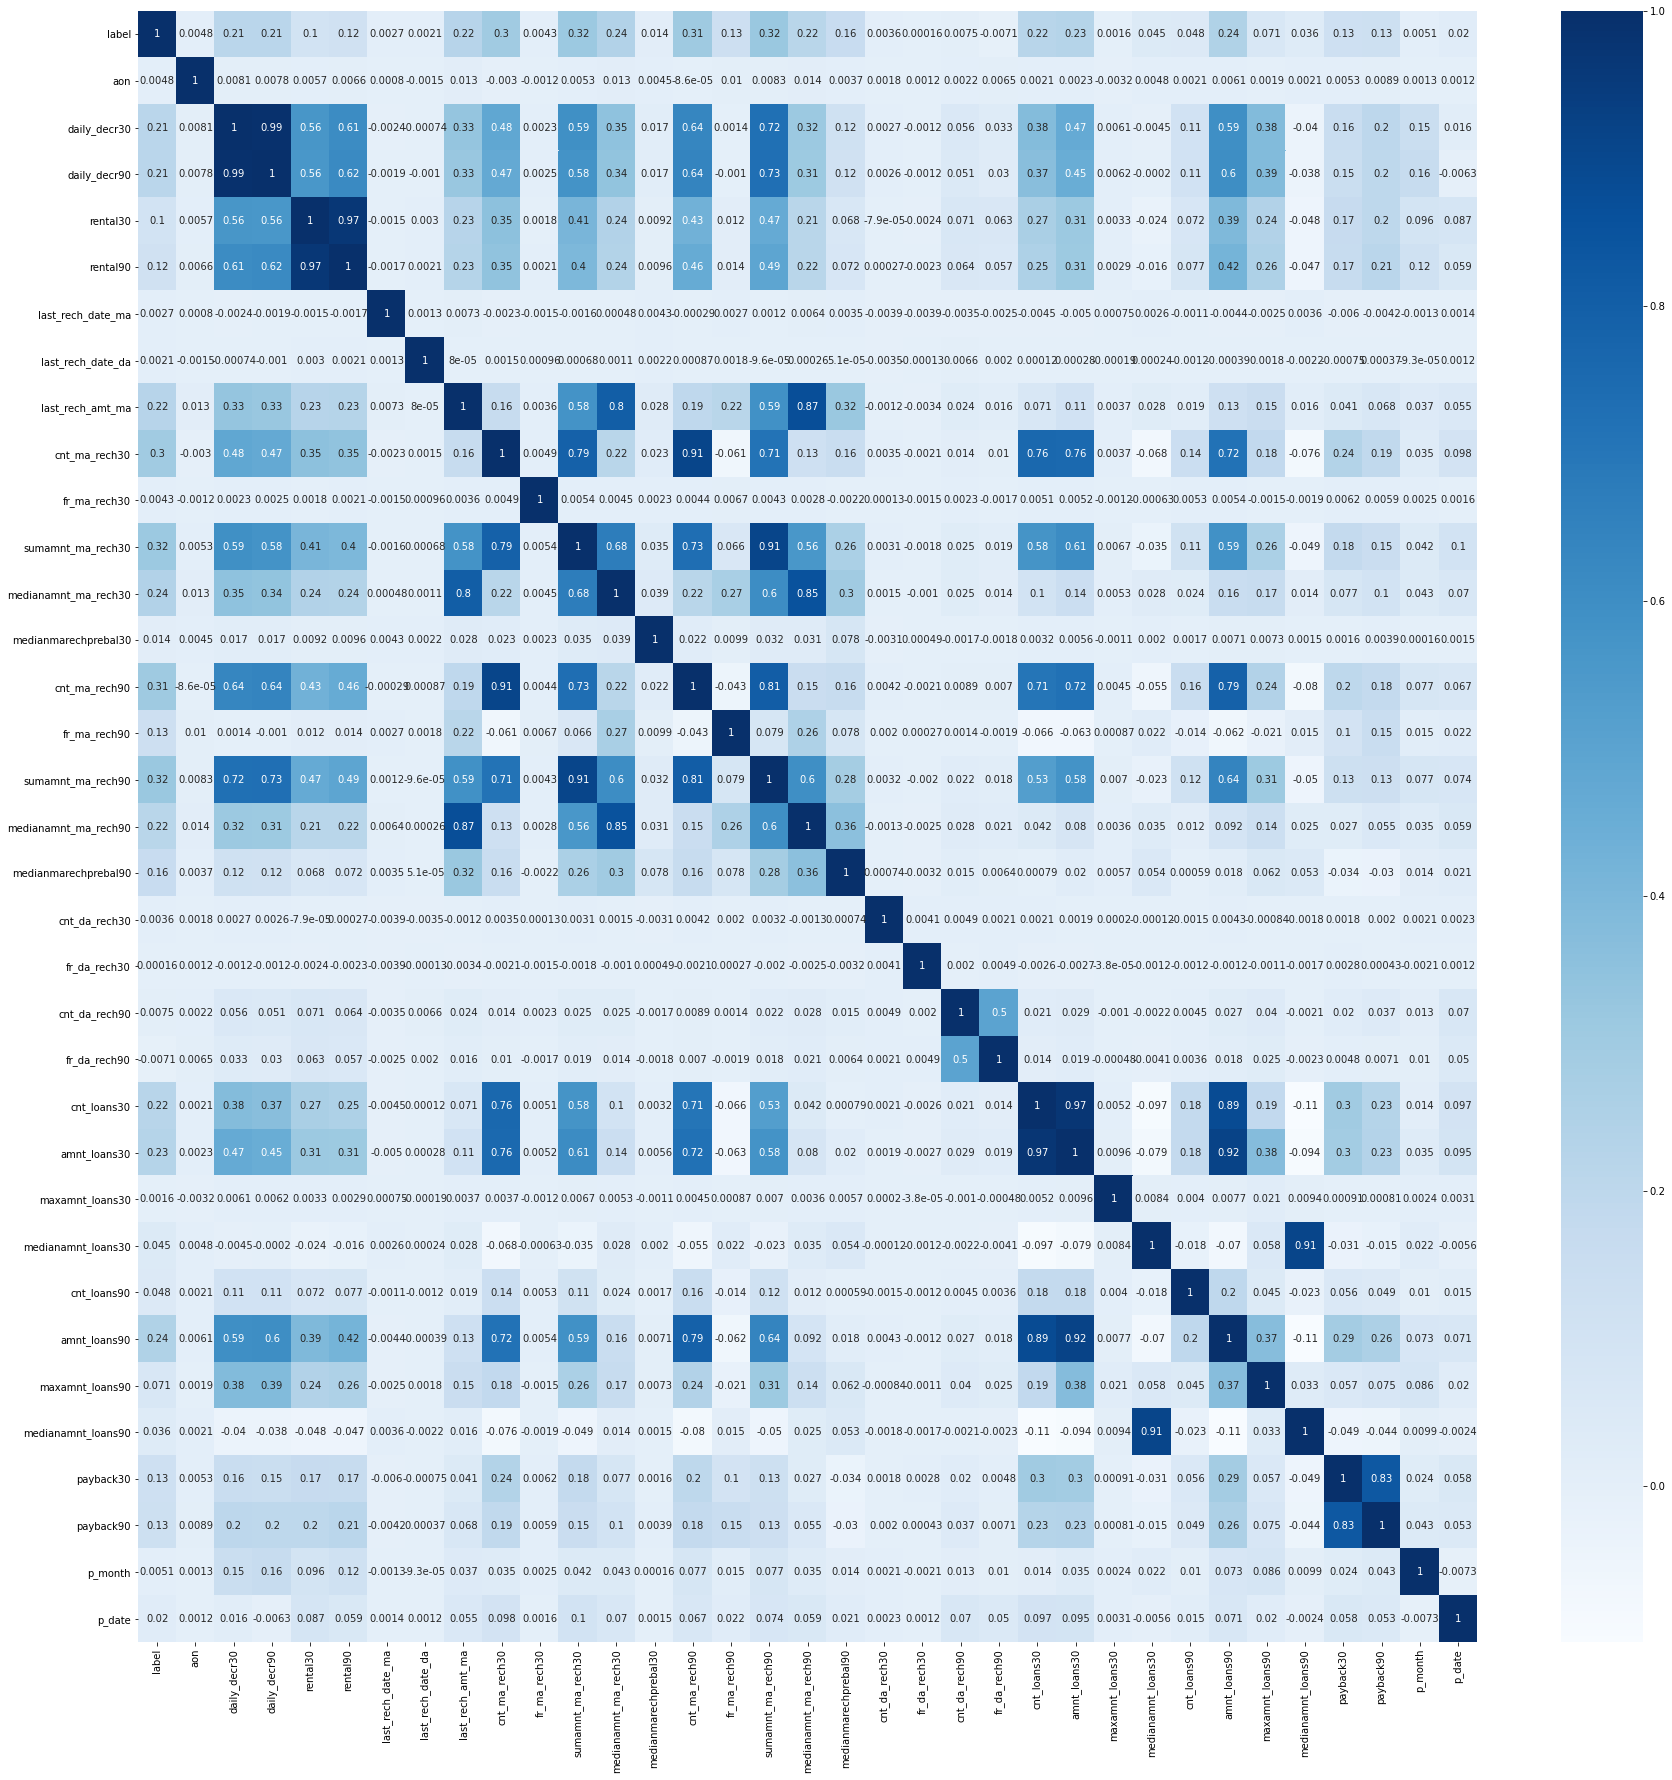

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,df.columns != 'label']
x

aon  daily_decr30  daily_decr90    rental30    rental90  \
0       31.045423    108.563104    108.745655   27.740881   30.319035   
1       51.404120    218.208992    218.233966  119.527939  119.527939   
2       44.303348     72.806417     72.806417   58.037655   58.037655   
3       29.112698      7.429316      7.429316   23.331403   23.331403   
4       59.579217     22.626761     22.626761   64.329481   64.329481   
...           ...           ...           ...         ...         ...   
209588  38.249224     22.728310     22.728310   64.036051   64.036051   
209589  63.604878     10.318441     10.318441   81.171149   81.171149   
209590  61.686733    215.661312    216.223280  151.138238  186.618133   
209591  81.258633    221.510432    222.279914   38.636437   60.787897   
209592  77.548727    132.020327    132.696993   42.041798   48.287175   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                1.464102           0.000000         76.485667       1.464102   
1                7.165151           0.000000        150.157813       0.828427   
2                2.000000           0.000000         76.485667       0.828427   
3               10.961481           0.000000         59.579217       0.000000   
4                2.472136           0.000000         94.124919       3.656854   
...                   ...                ...               ...            ...   
209588           0.828427           0.000000        125.263506       2.000000   
209589           2.472136           0.000000         53.641711       2.472136   
209590           2.000000           0.000000         76.485667       2.898979   
209591           1.464102          10.489996         53.641711       2.898979   
209592           5.483315           0.000000        171.516570       1.464102   

        fr_ma_rech30  ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0           7.380832  ...         3.291503                 0.0     1.464102   
1           0.000000  ...         5.211103                 0.0     0.828427   
2           0.000000  ...         3.291503                 0.0     0.828427   
3           0.000000  ...         3.291503                 0.0     1.464102   
4           1.464102  ...         3.291503                 0.0     3.656854   
...              ...  ...              ...                 ...          ...   
209588      1.464102  ...         3.291503                 0.0     1.464102   
209589      0.828427  ...         3.291503                 0.0     2.000000   
209590      4.000000  ...         5.211103                 0.0     3.291503   
209591      2.472136  ...         5.211103                 0.0     2.000000   
209592      0.828427  ...         5.211103                 0.0     1.464102   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0           5.211103         3.291503                 0.0   8.954451   
1           5.211103         5.211103                 0.0   0.000000   
2           3.291503         3.291503                 0.0   0.000000   
3           5.211103         3.291503                 0.0   0.000000   
4          11.114877         3.291503                 0.0   1.651484   
...              ...              ...                 ...        ...   
209588      5.211103         3.291503                 0.0   0.828427   
209589      6.717798         3.291503                 0.0   0.828427   
209590     12.832397         5.211103                 0.0   2.472136   
209591      8.000000         5.211103                 0.0   0.000000   
209592      6.717798         5.211103                 0.0   0.000000   

        payback90  p_month  p_date  
0        8.954451        7      20  
1        0.000000       10       8  
2        0.000000        8      19  
3        0.000000        6       6  
4        1.651484        6      22  
...           ...      ...     ...  
209588   0.828427        6      17  
209589   0.828427       12       6  
209590   2.396969

In [35]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [36]:
calc_vif(x)

variable  VIF factor
0                    aon    1.136394
1           daily_decr30  168.010788
2           daily_decr90  184.270736
3               rental30   53.519430
4               rental90   57.325154
5      last_rech_date_ma    1.008914
6      last_rech_date_da    1.005375
7       last_rech_amt_ma   18.663326
8          cnt_ma_rech30   88.631037
9           fr_ma_rech30    1.007461
10     sumamnt_ma_rech30  126.063524
11  medianamnt_ma_rech30   32.962741
12  medianmarechprebal30    1.037688
13         cnt_ma_rech90   94.660544
14          fr_ma_rech90    1.976527
15     sumamnt_ma_rech90  123.994037
16  medianamnt_ma_rech90   40.283323
17  medianmarechprebal90    2.494241
18         cnt_da_rech30    1.004784
19          fr_da_rech30    1.005009
20         cnt_da_rech90    1.367343
21          fr_da_rech90    1.338823
22           cnt_loans30  129.140225
23          amnt_loans30  198.348122
24       maxamnt_loans30    1.031398
25    medianamnt_loans30    6.386951
26           cnt_loans90    1.162322
27          amnt_loans90   51.722733
28       maxamnt_loans90   28.322694
29    medianamnt_loans90    6.342933
30             payback30    4.941402
31             payback90    5.185579
32               p_month    8.225621
33                p_date    4.441294

In [37]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

SMOTE PROCESS -as our target column is imbalanced

In [38]:
dfx=df.iloc[:,df.columns != 'label']
dfx

aon  daily_decr30  daily_decr90    rental30    rental90  \
0       31.045423    108.563104    108.745655   27.740881   30.319035   
1       51.404120    218.208992    218.233966  119.527939  119.527939   
2       44.303348     72.806417     72.806417   58.037655   58.037655   
3       29.112698      7.429316      7.429316   23.331403   23.331403   
4       59.579217     22.626761     22.626761   64.329481   64.329481   
...           ...           ...           ...         ...         ...   
209588  38.249224     22.728310     22.728310   64.036051   64.036051   
209589  63.604878     10.318441     10.318441   81.171149   81.171149   
209590  61.686733    215.661312    216.223280  151.138238  186.618133   
209591  81.258633    221.510432    222.279914   38.636437   60.787897   
209592  77.548727    132.020327    132.696993   42.041798   48.287175   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                1.464102           0.000000         76.485667       1.464102   
1                7.165151           0.000000        150.157813       0.828427   
2                2.000000           0.000000         76.485667       0.828427   
3               10.961481           0.000000         59.579217       0.000000   
4                2.472136           0.000000         94.124919       3.656854   
...                   ...                ...               ...            ...   
209588           0.828427           0.000000        125.263506       2.000000   
209589           2.472136           0.000000         53.641711       2.472136   
209590           2.000000           0.000000         76.485667       2.898979   
209591           1.464102          10.489996         53.641711       2.898979   
209592           5.483315           0.000000        171.516570       1.464102   

        fr_ma_rech30  ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0           7.380832  ...         3.291503                 0.0     1.464102   
1           0.000000  ...         5.211103                 0.0     0.828427   
2           0.000000  ...         3.291503                 0.0     0.828427   
3           0.000000  ...         3.291503                 0.0     1.464102   
4           1.464102  ...         3.291503                 0.0     3.656854   
...              ...  ...              ...                 ...          ...   
209588      1.464102  ...         3.291503                 0.0     1.464102   
209589      0.828427  ...         3.291503                 0.0     2.000000   
209590      4.000000  ...         5.211103                 0.0     3.291503   
209591      2.472136  ...         5.211103                 0.0     2.000000   
209592      0.828427  ...         5.211103                 0.0     1.464102   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0           5.211103         3.291503                 0.0   8.954451   
1           5.211103         5.211103                 0.0   0.000000   
2           3.291503         3.291503                 0.0   0.000000   
3           5.211103         3.291503                 0.0   0.000000   
4          11.114877         3.291503                 0.0   1.651484   
...              ...              ...                 ...        ...   
209588      5.211103         3.291503                 0.0   0.828427   
209589      6.717798         3.291503                 0.0   0.828427   
209590     12.832397         5.211103                 0.0   2.472136   
209591      8.000000         5.211103                 0.0   0.000000   
209592      6.717798         5.211103                 0.0   0.000000   

        payback90  p_month  p_date  
0        8.954451        7      20  
1        0.000000       10       8  
2        0.000000        8      19  
3        0.000000        6       6  
4        1.651484        6      22  
...           ...      ...     ...  
209588   0.828427        6      17  
209589   0.828427       12       6  
209590   2.396969

In [39]:
dfy=df.iloc[:,0]
dfy

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [41]:
trainy.value_counts()

1    183431
0    183431
Name: label, dtype: int64

PCA technique to reduce dimension

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca=PCA(n_components=10)                   #PCA technique(to reduce columns)
trainx=pca.fit_transform(trainx)

In [44]:
trainx.shape

(366862, 10)

STANDARD SCALER

In [45]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [46]:
trainx

array([[-0.03127606, -0.17434275, -0.11559354, ...,  0.22718854,
        -1.01503556, -0.88130623],
       [ 0.9840977 , -0.09403873, -0.11780027, ..., -0.55031844,
        -0.39370353, -3.25799102],
       [-0.28009681, -0.08780307, -0.02040199, ..., -0.0194331 ,
        -0.22438252, -1.09621664],
       ...,
       [-0.07515193, -0.17049172, -0.09828248, ..., -0.37466808,
         0.23372557,  0.12748703],
       [ 0.11258725, -0.00652325,  0.03859932, ...,  1.70720603,
         0.87535391,  0.2651483 ],
       [-0.56401747, -0.21591332, -0.08733714, ...,  0.4625578 ,
         0.65767421, -0.61332362]])

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [47]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8410216338509345 on random state 160


In [47]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=160)

In [52]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.7477080475017945
training score= 0.7465722752460057
[[44058 16876]
 [10891 38234]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76     60934
           1       0.69      0.78      0.73     49125

    accuracy                           0.75    110059
   macro avg       0.75      0.75      0.75    110059
weighted avg       0.75      0.75      0.75    110059
 

testing score= 0.8409398595298885
training score= 0.9999883178934825
[[47372  9929]
 [ 7577 45181]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     57301
           1       0.82      0.86      0.84     52758

    accuracy                           0.84    110059
   macro avg       0.84      0.84      0.84    110059
weighted avg       0.84      0.84      0.84    110059
 

testing score= 0.9061139934035382
training score= 0.9999805298224709
[[50503  5887]
 [ 4446 49223]]
              precision    recall  f1-scor

CROSS VALIDATION PROCESS

In [53]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,trainx,trainy,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.7477308  0.74380571 0.74666085 0.74810554 0.74543423 0.74540697
 0.75014992 0.75031347 0.7471515  0.74674263]
mean_score= 0.7471501620876859
std= 0.0019449686392816578 

score= [0.84722109 0.846894   0.84928856 0.85168729 0.85364989 0.85106035
 0.84964292 0.85354086 0.8525323  0.85111487]
mean_score= 0.8506632118108225
std= 0.0022603313291728222 

score= [0.91152179 0.90835991 0.91574443 0.91857929 0.91688928 0.92125061
 0.91915172 0.91936979 0.91855204 0.91784332]
mean_score= 0.9167262174079978
std= 0.0037340160128137563 

score= [0.87188923 0.86515659 0.86678842 0.86695197 0.87027749 0.86918716
 0.86992313 0.86842392 0.86755165 0.87395737]
mean_score= 0.8690106933276454
std= 0.00248451190556646 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter={"n_neighbors": [5,10],
          "weights": ["uniform","distance"],
          "p": [1,2],
          "algorithm": ["auto","ball_tree","kd_tree","brute"]}

In [50]:
gcv=GridSearchCV(KNeighborsClassifier(),parameter,cv=10)

In [52]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [53]:
gcv.best_params_ 

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [55]:
final_model=KNeighborsClassifier(n_neighbors=5,weights="distance",p=1,algorithm="auto")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.87317711409335


AUC-ROC CURVE

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [57]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.09225085, 0.        , 0.36301717, ..., 0.08353799, 0.64296362,
       1.        ])

In [58]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

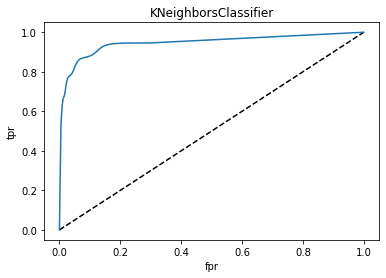

In [59]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("KNeighborsClassifier")
plt.show()

In [60]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
auc_score

0.8733088012239348

SAVING THE BEST MODEL

In [61]:
import joblib

joblib.dump(final_model,"micro_credit_defaulter.obj")

['micro_credit_defaulter.obj']

In [62]:
micro_credit_defaulter_from_joblib=joblib.load("micro_credit_defaulter.obj")
micro_credit_defaulter_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)